In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('cac_merged_20231106191438_004.csv')


In [3]:
print('Number of rows = {} and features = {}'.format(data.shape[0],data.shape[1]-1))

Number of rows = 70751 and features = 39


# Check for missing values

In [4]:
data.isna().sum()

Unnamed: 0                  0
food_category               0
food_department             0
food_family                 0
store_sales(in millions)    0
store_cost(in millions)     0
unit_sales(in millions)     0
promotion_name              0
sales_country               0
marital_status              0
gender                      0
total_children              0
education                   0
member_card                 0
occupation                  0
houseowner                  0
num_cars_owned              0
yearly_income               0
num_children_at_home        0
brand_name                  0
SRP                         0
gross_weight                0
net_weight                  0
recyclable_package          0
low_fat                     0
units_per_case              0
store_type                  0
store_city                  0
store_state                 0
store_sqft                  0
grocery_sqft                0
frozen_sqft                 0
meat_sqft                   0
coffee_bar

# Check for duplicate records

In [5]:
data.duplicated().value_counts()

False    70751
Name: count, dtype: int64

# Lets seperate target variable and divide the data into train and test to avoid data leakage

In [6]:
X = data.drop(columns='cost')
y = data['cost']

# Let us encode and scale X_train first then followed by X_test

# catergorical features

In [7]:
categorical_features = X.select_dtypes(exclude=["number"]).columns.tolist()
categorical_features

['food_category',
 'food_department',
 'food_family',
 'promotion_name',
 'sales_country',
 'marital_status',
 'gender',
 'education',
 'member_card',
 'occupation',
 'houseowner',
 'yearly_income',
 'brand_name',
 'store_type',
 'store_city',
 'store_state',
 'media_type']

In [8]:
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Function to calculate Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))



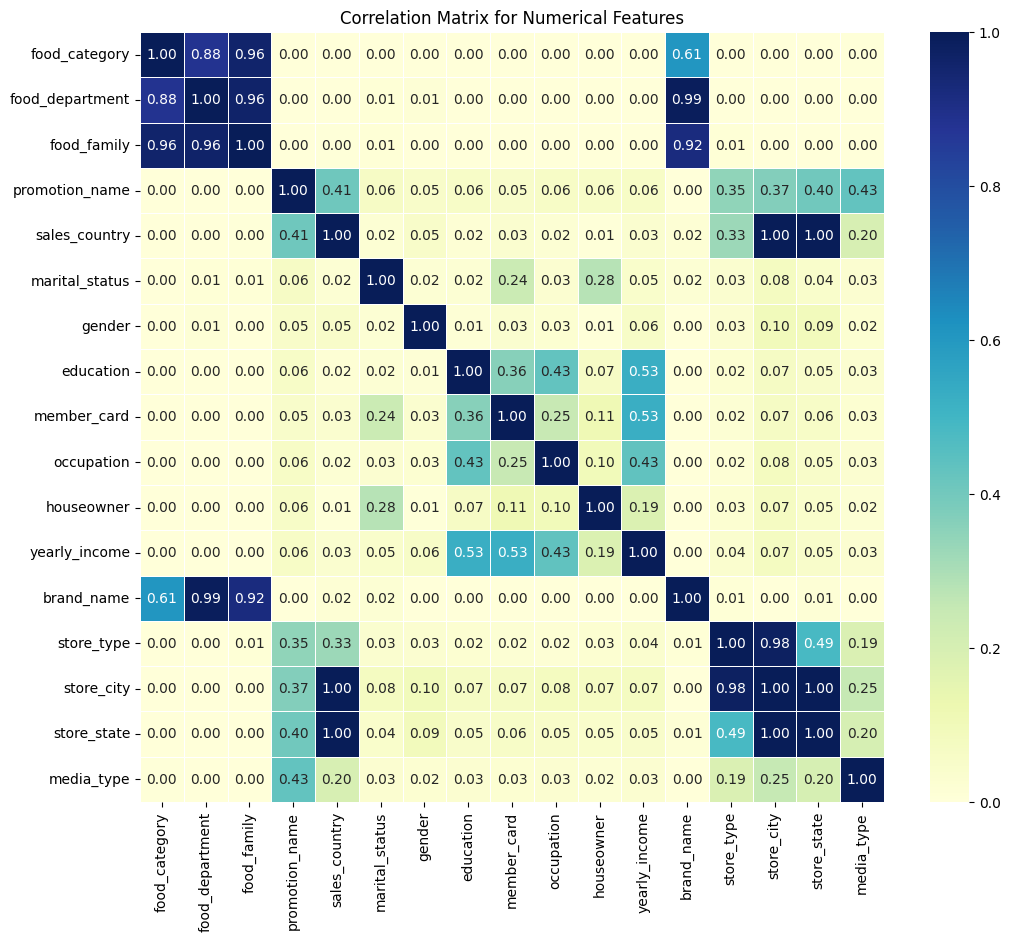

In [9]:
# Example DataFrame
cat_df = X[categorical_features]

# Calculate correlation matrix using Cramér's V
correlation_matrix = cat_df.apply(lambda x: cat_df.apply(lambda y: cramers_v(x, y)))
#print(correlation_matrix)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix for Numerical Features')
plt.show()


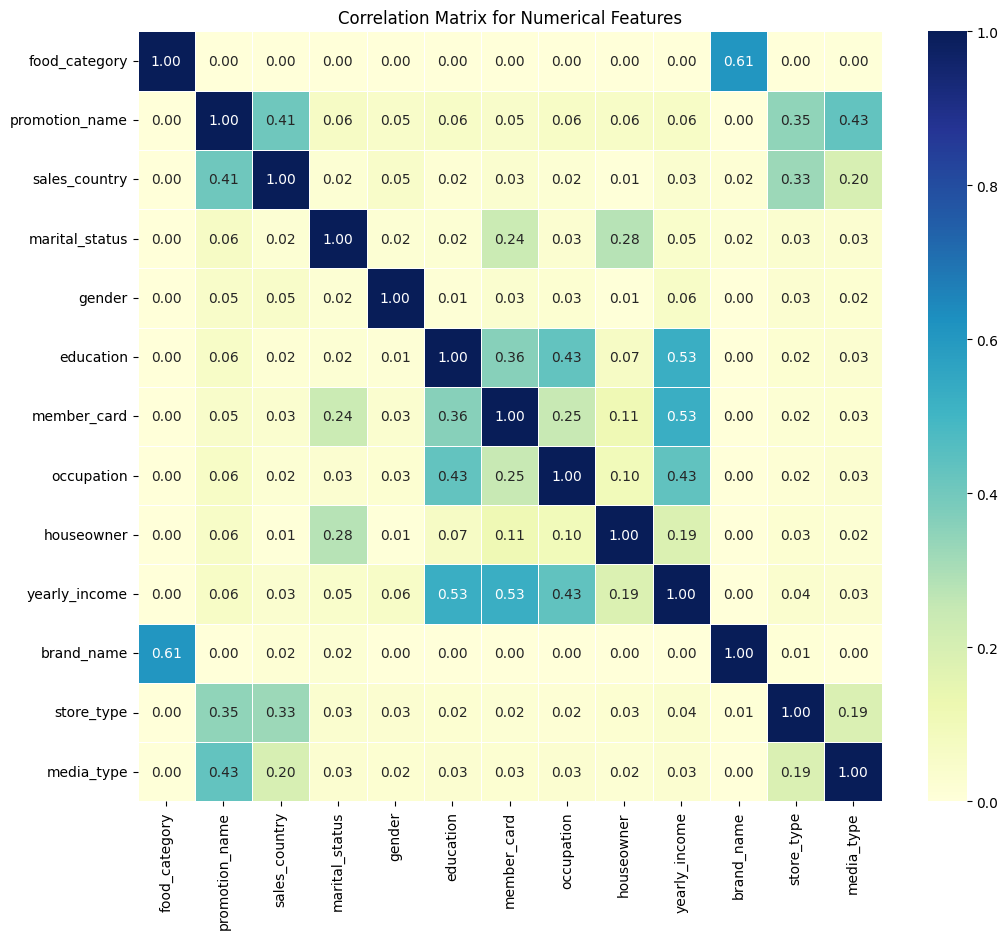

In [10]:
columns=['food_department','food_family','store_city','store_state']
cat_df=cat_df.drop(columns=columns,axis=1)
# Calculate correlation matrix using Cramér's V
correlation_matrix = cat_df.apply(lambda x: cat_df.apply(lambda y: cramers_v(x, y)))
#print(correlation_matrix)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix for Numerical Features')
plt.show()


## Numerical features

In [11]:

numerical_features = X.select_dtypes(include=["number"]).columns.tolist()
numerical_features

['Unnamed: 0',
 'store_sales(in millions)',
 'store_cost(in millions)',
 'unit_sales(in millions)',
 'total_children',
 'num_cars_owned',
 'num_children_at_home',
 'SRP',
 'gross_weight',
 'net_weight',
 'recyclable_package',
 'low_fat',
 'units_per_case',
 'store_sqft',
 'grocery_sqft',
 'frozen_sqft',
 'meat_sqft',
 'coffee_bar',
 'video_store',
 'salad_bar',
 'prepared_food',
 'florist']

In [12]:
num_df = X[numerical_features]


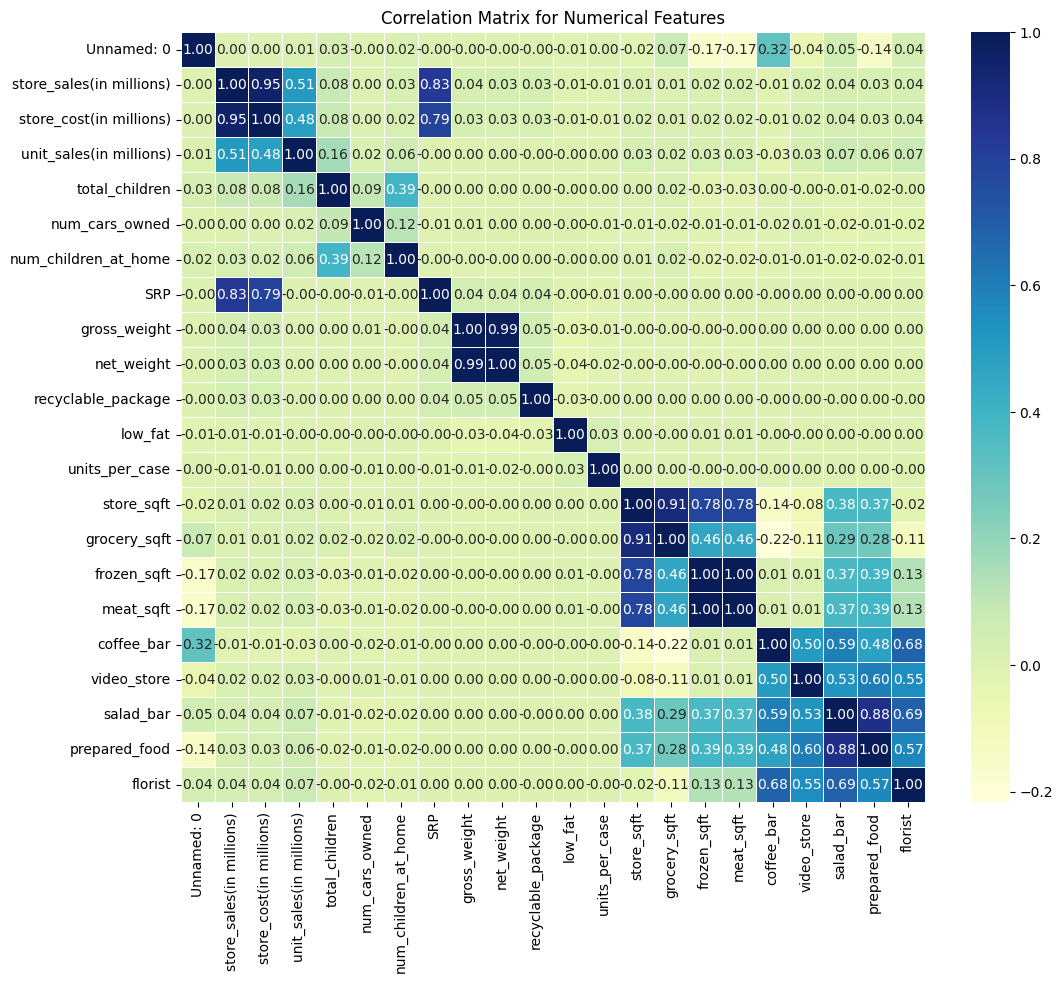

In [13]:
correlation_matrix = num_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix for Numerical Features')
plt.show()

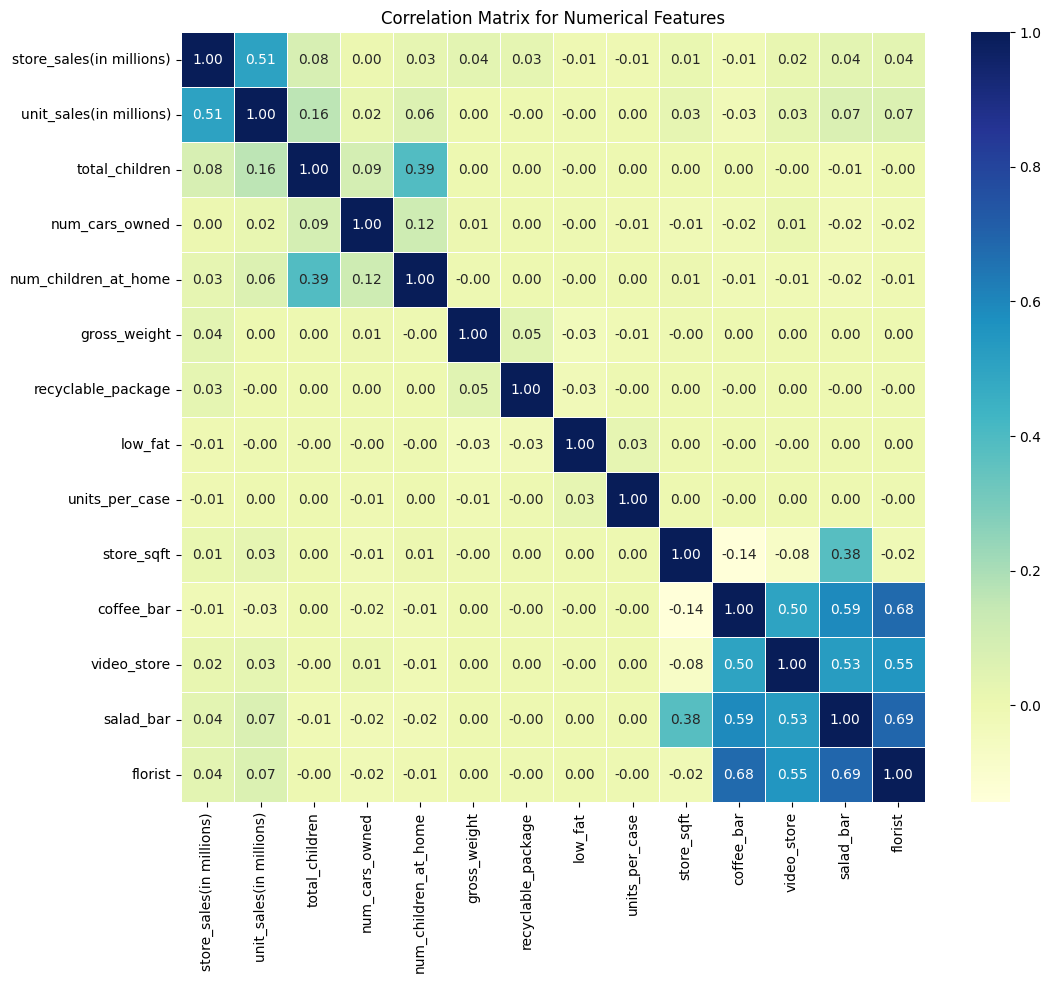

In [14]:
columns=['Unnamed: 0','store_cost(in millions)','SRP','net_weight','grocery_sqft','meat_sqft','frozen_sqft','prepared_food']
num_df=num_df.drop(columns=columns,axis=1)
correlation_matrix = num_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix for Numerical Features')
plt.show()


In [15]:
num_df.shape,cat_df.shape
X=pd.concat([cat_df, num_df], axis=1)
X.shape

(70751, 27)

In [16]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [17]:
print('X_train shape = ',X_train.shape)
print('X_test shape = ',X_test.shape)
print('Y_train shape = ',Y_train.shape)
print('Y_test shape = ',Y_test.shape)

X_train shape =  (56600, 27)
X_test shape =  (14151, 27)
Y_train shape =  (56600,)
Y_test shape =  (14151,)


# Listing all the different categories in categorical variables

##### Converting Binary variable to numerical

In [18]:
bin_cat_col = list()
for col in cat_df:
    if(len(X_train[col].value_counts())==2):
        print(col)
        bin_cat_col.append(col)



marital_status
gender
houseowner


In [19]:
X_train['marital_status'] = X_train['marital_status'].replace({'M':1,'S':0})
X_train['gender'] = X_train['gender'].replace({'F':1,'M':0})
X_train['houseowner'] = X_train['houseowner'].replace({'Y':1,'N':0})
X_train[bin_cat_col]

,marital_status,gender,houseowner
69390,1,1,1
67704,1,0,1
43387,0,0,1
47323,1,1,1
65373,0,1,0
...,...,...,...
37194,0,1,0
6265,0,1,1
54886,1,0,1
860,0,0,1


In [20]:
X_test['marital_status'] = X_test['marital_status'].replace({'M':1,'S':0})
X_test['gender'] = X_test['gender'].replace({'F':1,'M':0})
X_test['houseowner'] = X_test['houseowner'].replace({'Y':1,'N':0})
X_test[bin_cat_col]

,marital_status,gender,houseowner
52631,1,1,1
63396,1,1,1
64124,1,1,1
69697,1,0,1
53180,1,0,1
...,...,...,...
30400,1,0,1
40723,1,0,1
18023,1,0,0
63717,1,0,0


##### Non-Binary Categorical Variables

In [21]:
Non_bin_cat_col = list(set(cat_df)-set(bin_cat_col))
Non_bin_cat_col

['member_card',
 'sales_country',
 'media_type',
 'yearly_income',
 'food_category',
 'occupation',
 'brand_name',
 'promotion_name',
 'education',
 'store_type']

In [22]:
ordinal_cols = ['education', 'member_card', 'occupation','yearly_income','store_type']
nominal_cols = list(set(Non_bin_cat_col)-set(ordinal_cols))

In [23]:
len(Non_bin_cat_col)==len(ordinal_cols)+len(nominal_cols)

True

In [24]:
print('ordinal columns:')
print(ordinal_cols)
print('nominal columns')
print(nominal_cols)

ordinal columns:
['education', 'member_card', 'occupation', 'yearly_income', 'store_type']
nominal columns
['media_type', 'brand_name', 'food_category', 'promotion_name', 'sales_country']


In [25]:
ordin=data[ordinal_cols]
ordin

,education,member_card,occupation,yearly_income,store_type
0,Bachelors Degree,Golden,Management,$50K - $70K,Small Grocery
1,Bachelors Degree,Golden,Management,$50K - $70K,Small Grocery
2,Bachelors Degree,Golden,Management,$50K - $70K,Small Grocery
3,Bachelors Degree,Golden,Management,$50K - $70K,Small Grocery
4,Bachelors Degree,Golden,Management,$50K - $70K,Small Grocery
...,...,...,...,...,...
70746,Bachelors Degree,Bronze,Professional,$50K - $70K,Small Grocery
70747,Bachelors Degree,Bronze,Professional,$50K - $70K,Small Grocery
70748,High School Degree,Bronze,Manual,$30K - $50K,Small Grocery
70749,High School Degree,Bronze,Manual,$30K - $50K,Small Grocery


In [26]:
data[nominal_cols]

,media_type,brand_name,food_category,promotion_name,sales_country
0,Radio,Nationeel,Snack Foods,Go For It,USA
1,Radio,Hilltop,Hygiene,Go For It,USA
2,Radio,Fabulous,Carbonated Beverages,Go For It,USA
3,Radio,Bird Call,Decongestants,Go For It,USA
4,Radio,Great,Bread,Go For It,USA
...,...,...,...,...,...
70746,Street Handout,PigTail,Meat,Mystery Sale,Mexico
70747,Street Handout,Landslide,Jams and Jellies,Mystery Sale,Mexico
70748,Street Handout,High Top,Vegetables,Mystery Sale,Mexico
70749,Street Handout,Sunset,Cleaning Supplies,Mystery Sale,Mexico


In [27]:
X_train_ordinal=X_train[ordinal_cols]
X_test_ordinal=X_test[ordinal_cols]

In [28]:
# ordinal variables are encoded using ordinal encoder
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
X_train_ordinal=ordinal_encoder.fit_transform(X_train_ordinal)
X_test_ordinal = ordinal_encoder.transform(X_test_ordinal)

In [29]:
X_train_ordinal = pd.DataFrame(X_train_ordinal, columns=ordinal_cols)
X_test_ordinal = pd.DataFrame(X_test_ordinal, columns=ordinal_cols)

In [30]:
X_train_nominal = X_train[nominal_cols]
X_test_nominal = X_test[nominal_cols]

In [31]:
# nominal variables are encoded using onehotencoder
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder()
onehot_encoder.fit(X_train_nominal)
X_train_nominal = onehot_encoder.transform(X_train_nominal)
X_test_nominal = onehot_encoder.transform(X_test_nominal)

In [32]:
X_train_nominal = pd.DataFrame.sparse.from_spmatrix(X_train_nominal)
X_test_nominal = pd.DataFrame.sparse.from_spmatrix(X_test_nominal)

In [33]:
# lets drop the non binary not encoded categorical columns
X_train.drop(columns=Non_bin_cat_col, inplace=True)
X_test.drop(columns=Non_bin_cat_col, inplace=True)

In [34]:
# lets add the ordinal and nominal encoded columns to X_train and X_test
X_train_new = pd.concat([X_train.reset_index(drop=True), X_train_ordinal.reset_index(drop=True), X_train_nominal.reset_index(drop=True)], axis=1)
X_test_new = pd.concat([X_test.reset_index(drop=True), X_test_ordinal.reset_index(drop=True), X_test_nominal.reset_index(drop=True)], axis=1)

In [35]:
print('X_train shape after categorical columns encoding = ', X_train_new.shape)
print('X_test shape after categorical columns encoding = ', X_test_new.shape)

X_train shape after categorical columns encoding =  (56600, 243)
X_test shape after categorical columns encoding =  (14151, 243)


In [36]:
X_train_new

,marital_status,gender,houseowner,store_sales(in millions),unit_sales(in millions),total_children,num_cars_owned,num_children_at_home,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,florist,education,member_card,occupation,yearly_income,store_type,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220
0,1,1,1,7.64,2,1,2,0,14.10,0,1,32,27950.0,0,0,0,0,0.0,0.0,1.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,0,1,3.14,2,1,2,1,8.79,0,0,21,27950.0,1,0,1,1,4.0,2.0,2.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,0,1,9.75,3,0,0,0,17.20,1,0,15,27950.0,1,0,1,1,4.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,1,1,18.10,5,5,2,5,19.70,1,0,12,34791.0,0,0,1,0,4.0,2.0,2.0,0.0

# Outlier Analysis

In [37]:
X_train_new.columns = X_train_new.columns.astype(str)
X_test_new.columns = X_test_new.columns.astype(str)

In [38]:
# lets get the outliers in X_train
local_outlier_factor = LocalOutlierFactor()
y_outlier_pred = local_outlier_factor.fit_predict(X_train)

In [39]:
# predicts 1(not outlier) or -1(outlier) using KNN algorithm in background
y_outlier_pred

array([1, 1, 1, ..., 1, 1, 1])

In [40]:
not_outliers = y_outlier_pred != -1

In [41]:
not_outliers = pd.DataFrame(not_outliers, columns=['not_outlier'])

In [42]:
not_outliers.head()

,not_outlier
0,True
1,True
2,True
3,True
4,True


In [43]:
not_outliers.shape

(56600, 1)

In [44]:
# Not outliers = True and Outliers = False
not_outliers['not_outlier'].value_counts()

not_outlier
True     56575
False       25
Name: count, dtype: int64

In [45]:
not_outliers.isna().sum()

not_outlier    0
dtype: int64

In [46]:
# lets remove the 18 outliers from X_train and Y_train
X_train_new['not_outlier'] = not_outliers

In [47]:
# sample outliers in X_train
X_train_new[X_train_new['not_outlier']==False]

,marital_status,gender,houseowner,store_sales(in millions),unit_sales(in millions),total_children,num_cars_owned,num_children_at_home,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,florist,education,member_card,occupation,yearly_income,store_type,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,not_outlier
1007,0,1,0,18.70,5,5,1,0,10.30,1,0,34,39696.0,0,0,1,0,4.0,3.0,4.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,False
5483,1,0,0,18.60,5,4,2,4,6.16,1,0,21,23759.0,1,0,1,1,4.0,2.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,False
5808,0,1,1,19.75,5,4,1,0,18.30,0,0,35,33858.0,1,0,1,1,4.0,3.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,False
5997,1,1,1,19.00,5,5,2,5

In [48]:
Y_train.shape

(56600,)

In [49]:
Y_train = pd.concat([Y_train.reset_index(drop=True), not_outliers.reset_index(drop=True)],axis=1)
Y_train.head()

,cost,not_outlier
0,69.29,True
1,70.06,True
2,32.60,True
3,39.61,True
4,71.03,True


In [50]:
X_train_new.shape, Y_train.shape

((56600, 244), (56600, 2))

In [51]:
X_train_new = X_train_new[X_train_new['not_outlier']]

In [52]:
X_train_new['not_outlier'].value_counts()

not_outlier
True    56575
Name: count, dtype: int64

In [53]:
Y_train = Y_train[Y_train['not_outlier']]

In [54]:
Y_train['not_outlier'].value_counts()

not_outlier
True    56575
Name: count, dtype: int64

In [55]:
X_train_new.drop(columns=['not_outlier'],inplace=True)
Y_train.drop(columns=['not_outlier'],inplace=True)

In [56]:
X_train_new.shape, Y_train.shape

((56575, 243), (56575, 1))

# lets generate two sets of X_train one with numeric columns being standardized and one with numeric columns being normalized

In [57]:
pure_numeric = ['store_sales(in millions)',
 'gross_weight',
 'units_per_case',
 'store_sqft']

for col in pure_numeric:
  print('-'*30)
  print(col)
  print('-'*30)
  print(len(X_train[col].value_counts()))
  print()

------------------------------
store_sales(in millions)
------------------------------
1030

------------------------------
gross_weight
------------------------------
376

------------------------------
units_per_case
------------------------------
36

------------------------------
store_sqft
------------------------------
21



In [58]:
X_train[pure_numeric]

,store_sales(in millions),gross_weight,units_per_case,store_sqft
69390,7.64,14.10,32,27950.0
67704,3.14,8.79,21,27950.0
43387,9.75,17.20,15,27950.0
47323,18.10,19.70,12,34791.0
65373,13.72,13.20,5,27950.0
...,...,...,...,...
37194,4.26,8.25,35,23759.0
6265,6.74,18.90,18,23598.0
54886,1.54,15.70,9,21215.0
860,11.79,15.50,23,39696.0


In [59]:
# numerical valued features which might be actually categorical features
cat_num_features = [
 'unit_sales(in millions)',
 'total_children',
 'num_cars_owned',
 'num_children_at_home',
 'recyclable_package',
 'low_fat',
 'coffee_bar',
 'video_store',
 'salad_bar',
 'florist']
for col in cat_num_features:
  print('-'*30)
  print(col)
  print('-'*30)
  print(X_train[col].value_counts())

------------------------------
unit_sales(in millions)
------------------------------
unit_sales(in millions)
3    25520
4    15542
2    12688
5     1936
1      892
6       22
Name: count, dtype: int64
------------------------------
total_children
------------------------------
total_children
4    11627
2    11597
3    11355
1    10964
5     5889
0     5168
Name: count, dtype: int64
------------------------------
num_cars_owned
------------------------------
num_cars_owned
2    17237
3    15882
1    12747
4     7526
0     3208
Name: count, dtype: int64
------------------------------
num_children_at_home
------------------------------
num_children_at_home
0    35280
1     8171
2     5489
3     4094
4     2353
5     1213
Name: count, dtype: int64
------------------------------
recyclable_package
------------------------------
recyclable_package
1    31653
0    24947
Name: count, dtype: int64
------------------------------
low_fat
------------------------------
low_fat
0    36867
1    197

In [60]:
X_train[cat_num_features]

,unit_sales(in millions),total_children,num_cars_owned,num_children_at_home,recyclable_package,low_fat,coffee_bar,video_store,salad_bar,florist
69390,2,1,2,0,0,1,0,0,0,0
67704,2,1,2,1,0,0,1,0,1,1
43387,3,0,0,0,1,0,1,0,1,1
47323,5,5,2,5,1,0,0,0,1,0
65373,4,4,2,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...
37194,3,4,2,0,1,0,1,0,1,1
6265,2,2,1,0,0,0,0,0,0,1
54886,2,4,3,3,1,1,1,0,0,0
860,3,1,2,0,1,1,0,0,1,0


In [61]:
X_train_num = X_train_new[pure_numeric]
X_test_num = X_test_new[pure_numeric]

In [62]:
std_scalar = StandardScaler()
X_train_std_num=std_scalar.fit_transform(X_train_num)
X_test_std_num = std_scalar.transform(X_test_num)

In [63]:
X_train_std_num = pd.DataFrame(X_train_std_num,columns=X_train_num.columns)
X_train_std_num.head()

,store_sales(in millions),gross_weight,units_per_case,store_sqft
0,0.317985,0.063574,1.280552,-0.004413
1,-0.977546,-1.085754,0.209133,-0.004413
2,0.925445,0.734556,-0.375278,-0.004413
3,3.329376,1.275671,-0.667483,1.293583
4,2.068392,-0.131228,-1.349295,-0.004413


In [64]:
X_test_std_num = pd.DataFrame(X_test_std_num,columns=X_test_num.columns)
X_test_std_num.head()

,store_sales(in millions),gross_weight,units_per_case,store_sqft
0,-0.326901,-0.326029,-1.154492,0.495356
1,-0.395996,0.193441,-0.472679,-0.004413
2,2.172034,-0.737276,1.475355,-0.004413
3,-1.524548,0.388243,1.085748,-0.004413
4,2.241129,-0.542475,1.572757,0.495356


In [65]:
X_train_non_num = list(set(X_train_new.columns )-set(X_train_std_num.columns))
X_train_nn = X_train_new[X_train_non_num]
X_train_std = pd.concat([X_train_nn.reset_index(drop=True),X_train_std_num.reset_index(drop=True)],axis=1)

In [66]:
X_test_non_num = list(set(X_test_new.columns)-set(X_test_std_num.columns))
X_test_nn = X_test_new[X_test_non_num]
X_test_std = pd.concat([X_test_nn.reset_index(drop=True),X_test_std_num.reset_index(drop=True)],axis=1)

In [67]:
X_train_std.shape, X_test_std.shape

((56575, 243), (14151, 243))

In [68]:
Y_train.shape, Y_test.shape

((56575, 1), (14151,))

In [69]:
X_train_std = X_train_std.reset_index(drop=True)
Y_train = Y_train.reset_index(drop=True)

In [70]:
X_test_std = X_test_std.reset_index(drop=True)
Y_test = Y_test.reset_index(drop=True)

# Feature selection: Retain p-significant features

In [71]:
pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [72]:
import statsmodels.api as sm


def get_p_significant_features(X,y):
  X = sm.add_constant(X)
  ols_model = sm.OLS(y, X).fit()

  p_features = {}
  for i in X.columns.tolist():
    p_features[f'{i}'] = ols_model.pvalues[i]

  data_p_value= pd.DataFrame(p_features.items(), columns=['Feature_name', 'p-Value']).sort_values(by = 'p-Value').reset_index(drop=True)
  print('-'*50)
  print('p-significant columns/features')
  print('-'*50)
  print(data_p_value[data_p_value['p-Value'] < 0.05])
  significant_features = data_p_value[data_p_value['p-Value']<0.05]['Feature_name'].tolist()

  return significant_features


X_train_significant = get_p_significant_features(X_train_std,Y_train)
print(X_train_significant)

--------------------------------------------------
p-significant columns/features
--------------------------------------------------
               Feature_name   p-Value
0                     const  0.000000
1                       220  0.000000
2   unit_sales(in millions)  0.000000
3                       219  0.000000
4                 salad_bar  0.000000
..                      ...       ...
78                       93  0.028880
79                       80  0.033411
80                      204  0.041709
81                       27  0.044424
82                      102  0.048183

[83 rows x 2 columns]
['const', '220', 'unit_sales(in millions)', '219', 'salad_bar', 'florist', 'coffee_bar', '11', '218', '216', '196', '182', '1', '214', '9', 'store_sqft', '185', '206', '189', '190', '181', '215', '12', '173', 'video_store', '199', '210', '6', '171', '7', '186', '213', '179', '2', '205', '211', '3', '169', '0', 'store_type', '180', '170', '207', '212', '203', '195', '178', '194', '202',

In [73]:
num_col_list = list()
str_col_list = list()
for col in X_train_significant:
  if(col.isdigit()):
    num_col_list.append(int(col))
  else:
    str_col_list.append(col)

print(num_col_list)
print(str_col_list)

[220, 219, 11, 218, 216, 196, 182, 1, 214, 9, 185, 206, 189, 190, 181, 215, 12, 173, 199, 210, 6, 171, 7, 186, 213, 179, 2, 205, 211, 3, 169, 0, 180, 170, 207, 212, 203, 195, 178, 194, 202, 200, 165, 187, 209, 5, 191, 174, 198, 193, 152, 167, 217, 141, 166, 175, 184, 130, 177, 168, 127, 148, 71, 144, 126, 201, 93, 80, 204, 27, 102]
['const', 'unit_sales(in millions)', 'salad_bar', 'florist', 'coffee_bar', 'store_sqft', 'video_store', 'store_type', 'total_children', 'houseowner', 'marital_status', 'num_cars_owned']


In [74]:
str_col_list.remove('const')

In [75]:
significant_col_list = list()
significant_col_list.extend(str_col_list)
significant_col_list.extend(num_col_list)
print('significant_col_list',significant_col_list)

significant_col_list ['unit_sales(in millions)', 'salad_bar', 'florist', 'coffee_bar', 'store_sqft', 'video_store', 'store_type', 'total_children', 'houseowner', 'marital_status', 'num_cars_owned', 220, 219, 11, 218, 216, 196, 182, 1, 214, 9, 185, 206, 189, 190, 181, 215, 12, 173, 199, 210, 6, 171, 7, 186, 213, 179, 2, 205, 211, 3, 169, 0, 180, 170, 207, 212, 203, 195, 178, 194, 202, 200, 165, 187, 209, 5, 191, 174, 198, 193, 152, 167, 217, 141, 166, 175, 184, 130, 177, 168, 127, 148, 71, 144, 126, 201, 93, 80, 204, 27, 102]


In [76]:
print('P-significant features:',len(significant_col_list))

P-significant features: 82


In [77]:
X_train_significant.remove("const")

In [78]:
print(X_train_significant)

['220', 'unit_sales(in millions)', '219', 'salad_bar', 'florist', 'coffee_bar', '11', '218', '216', '196', '182', '1', '214', '9', 'store_sqft', '185', '206', '189', '190', '181', '215', '12', '173', 'video_store', '199', '210', '6', '171', '7', '186', '213', '179', '2', '205', '211', '3', '169', '0', 'store_type', '180', '170', '207', '212', '203', '195', '178', '194', '202', '200', 'total_children', '165', '187', '209', 'houseowner', '5', '191', '174', '198', '193', '152', '167', '217', '141', 'marital_status', '166', 'num_cars_owned', '175', '184', '130', '177', '168', '127', '148', '71', '144', '126', '201', '93', '80', '204', '27', '102']


In [79]:
X_train_signi = X_train_std[X_train_significant]
X_test_signi = X_test_std[X_train_significant]
X_train_signi.shape,X_test_signi.shape

((56575, 82), (14151, 82))

In [80]:
# shape of X_train and X_test after select p-significant features
X_train_signi.shape, X_test_signi.shape

((56575, 82), (14151, 82))

##### Principal Component Analysis

In [81]:
from sklearn.decomposition import PCA
def pca_dim_reduction(X_train,X_test):
    pca=PCA(0.95)
    X_pca_train=pca.fit_transform(X_train)
    X_pca_test=pca.transform(X_test)
    return X_pca_train, X_pca_test

In [82]:
X_pca_train, X_pca_test=pca_dim_reduction(X_train_signi,X_test_signi)
X_pca_train.shape, X_pca_test.shape,Y_train.shape

((56575, 39), (14151, 39), (56575, 1))

Harika Code

In [83]:
signi_x_train = X_train_signi
signi_x_test = X_test_signi
y_train = Y_train
y_test = Y_test

In [84]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score


In [85]:
def pca_transformation(variance, signi_x_train,signi_x_test):
    pca = PCA(variance)
    pca.fit(signi_x_train)
    x_train_pca = pca.fit_transform(signi_x_train)
    x_test_pca = pca.transform(signi_x_test)
    return x_train_pca, x_test_pca


In [86]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def cal_metrics(y_test,y_pred,is_print=True):
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

# Print or use the metrics as needed
    if(is_print):
        print("Mean Squared Error (MSE):", mse)
        print("Mean Absolute Error (MAE):", mae)
        print("Root Mean Squared Error (RMSE):", rmse)
        print("R-squared (R2):", r2)
    return mse,mae,rmse,r2

In [87]:
#select the best pca for three different variances
pca_variance_list = [0.80,0.85,0.9, 0.95]

r2_list = []


for pca_var in pca_variance_list:
    # Create a RandomForestRegressor model
    x_train_pca, x_test_pca = pca_transformation(pca_var, signi_x_train, signi_x_test)
    print('Number of features after PCA Transformation with variance %f : %d ' % (pca_var, x_train_pca.shape[1]))
    rf_model = RandomForestRegressor(n_estimators=50, max_depth = 10, min_samples_split = 5, random_state=42)
    # Training the model using training data
    rf_model.fit(x_train_pca, y_train)

    # Making predictions on training data
    y_train_pred = rf_model.predict(x_train_pca)

    # Evaluating the model on training data
    r2_train = r2_score(y_train, y_train_pred)

    print("R2 Score: %f with PCA Variance %f" % (r2_train, pca_var))
    r2_list.append(r2_train)
    print("\n")
    



Number of features after PCA Transformation with variance 0.800000 : 9 
R2 Score: 0.807161 with PCA Variance 0.800000


Number of features after PCA Transformation with variance 0.850000 : 14 
R2 Score: 0.846352 with PCA Variance 0.850000


Number of features after PCA Transformation with variance 0.900000 : 22 
R2 Score: 0.902449 with PCA Variance 0.900000


Number of features after PCA Transformation with variance 0.950000 : 39 
R2 Score: 0.916197 with PCA Variance 0.950000




In [88]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

best_pca_var = 0.95
# Defining the hyperparameter grid to search
param_grid = {
    'n_estimators': [50,100],
    'max_depth': [5,10,15],
    'min_samples_split': [2, 5, 10]
}

# Creating a RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)
x_train_pca, x_test_pca = pca_transformation(best_pca_var, signi_x_train, signi_x_test)
# Using GridSearchCV for searching best hyperparameters
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(x_train_pca, y_train)

# Printing the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Getting the best model
best_rf_model_pca = grid_search.best_estimator_



/home/harika/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/harika/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/harika/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/harika/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

Best Hyperparameters: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 100}


In [89]:
# Evaluating the best model on test set
y_pred_pca = best_rf_model_pca.predict(x_test_pca)
mse,mae,rmse,r2 = cal_metrics(y_test,y_pred_pca)


Mean Squared Error (MSE): 266.51231743058526
Mean Absolute Error (MAE): 6.0533055027263005
Root Mean Squared Error (RMSE): 16.325204973616266
R-squared (R2): 0.9534576977130746


In [97]:
X_train_signi.shape

(56575, 82)

In [91]:
#Function for SelectingKBest features.
from matplotlib import pyplot as plt
from sklearn.feature_selection import SelectKBest, mutual_info_regression


def select_top_k_features(k, X_train, y_train, X_test):
    # Creating a SelectKBest instance using the mutual_info_regression as scoring function
    feature_selector = SelectKBest(score_func=mutual_info_regression, k=k)
    
    # Fitting feature selector on training data
    feature_selector.fit(X_train, y_train)
    
    # Getting the indices of selected features
    selected_indices = feature_selector.get_support(indices=True)
    
    # Retrieving the names of selected features
    feature_names = X_train.columns
    selected_feature_names = feature_names[selected_indices]
    
    print('-'*50)
    print('Selected features using mutual_info_regression')
    print('-'*50)
    print(selected_feature_names)
    
    # Transforming the test and training sets to include only selected features
    X_train_selected = X_train[selected_feature_names]
    X_test_selected = X_test[selected_feature_names]

    return X_train_selected, X_test_selected


In [92]:
X_train_select, X_test_select = select_top_k_features(39, signi_x_train, y_train, signi_x_test)

--------------------------------------------------
Selected features using mutual_info_regression
--------------------------------------------------
Index(['220', '219', 'salad_bar', 'florist', 'coffee_bar', '11', '218', '216',
       '196', '1', '9', 'store_sqft', '185', '189', '12', 'video_store', '199',
       '6', '7', '2', '205', '3', '0', 'store_type', '180', '170', '207',
       '212', '195', '178', '194', '202', '200', '187', '5', '191', '198',
       '175', '184'],
      dtype='object')


In [93]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rf_model = RandomForestRegressor(n_estimators=50, max_depth = 10, min_samples_split = 5, random_state=42)
# Training the model on training data
rf_model.fit(X_train_select, y_train)

# Making predictions on training data
y_train_pred = rf_model.predict(X_train_select)

# Evaluating model on training data
r2_train = r2_score(y_train, y_train_pred)

print(f'R-squared on training data: {r2_train}')

R-squared on training data: 0.8386080830449033


In [94]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Defining hyperparameter tunning for grid search
param_grid = {
    'n_estimators': [50,100],
    'max_depth': [5,10,15],
    'min_samples_split': [2, 5, 10]
}

# Creating a RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)
# Using the GridSearchCV to search for best hyperparameters
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_select, y_train)

# Printing best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Getting the best model
best_rf_model = grid_search.best_estimator_

# Evaluating the best model on test set
y_pred = best_rf_model.predict(X_test_select)
mse,mae,rmse,r2 = cal_metrics(y_test,y_pred)

/home/harika/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:785: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/harika/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/harika/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:785: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/harika/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:785: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/harika/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed whe

Best Hyperparameters: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 50}
Mean Squared Error (MSE): 558.9695595929626
Mean Absolute Error (MAE): 9.742979071678155
Root Mean Squared Error (RMSE): 23.642537080291586
R-squared (R2): 0.9023845109202461


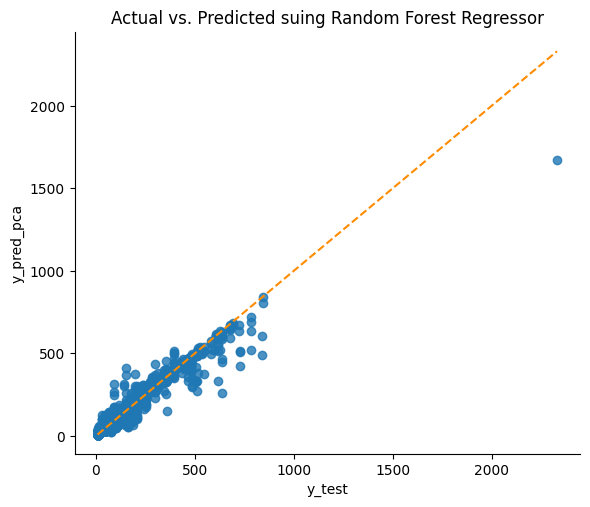

In [95]:
import seaborn as sns
compare_test_pred = pd.DataFrame({'y_test':y_test.ravel(), 'y_pred_pca':y_pred_pca}, columns=['y_test','y_pred_pca'])
sns.lmplot(x='y_test', y='y_pred_pca', data=compare_test_pred, fit_reg=False, height=5, aspect=1.2)

# plotting the diagonal line
line_coords = np.arange(y_test.min(), y_pred.max())
plt.plot(line_coords, line_coords, color='darkorange', linestyle='--')
plt.title('Actual vs. Predicted suing Random Forest Regressor')
plt.show()

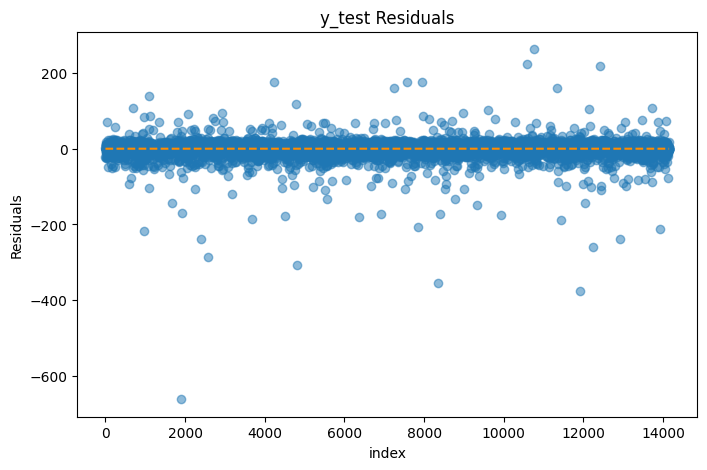

In [100]:
# Plotting the residuals
plt.subplots(figsize=(8, 5))

ax = plt.subplot(111)  # For removing spines
res_y = y_pred_pca-y_test
plt.scatter(x=np.arange(0,len(y_test)), y=(y_pred_pca-y_test), alpha=0.5)
plt.plot(np.repeat(0, len(y_test)), color='darkorange', linestyle='--')
plt.title('y_test Residuals')
plt.ylabel('Residuals')
plt.xlabel('index')
plt.show()

In [101]:
mse_list = []
mae_list = []
rmse_list = []
r2_list = []
for i in range(1,101):
    rf_model = RandomForestRegressor(n_estimators=i, max_depth = 15, min_samples_split = 2, random_state=42)
    # Training the model on training data
    rf_model.fit(x_train_pca, y_train)
    y_pred_pca_stream = rf_model.predict(x_test_pca)
    mse,mae,rmse,r2 = cal_metrics(y_test,y_pred_pca_stream,False)
    mse_list.append(mse)
    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)


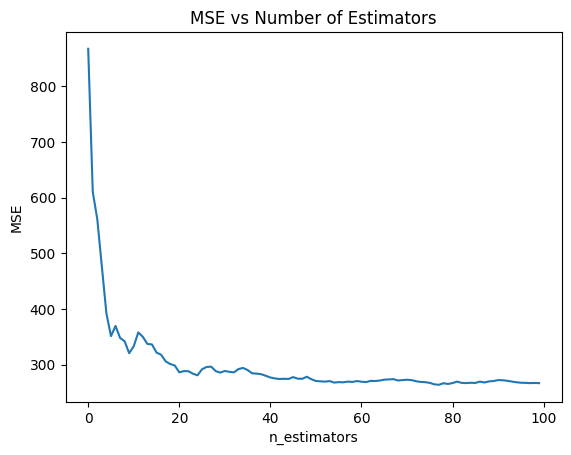

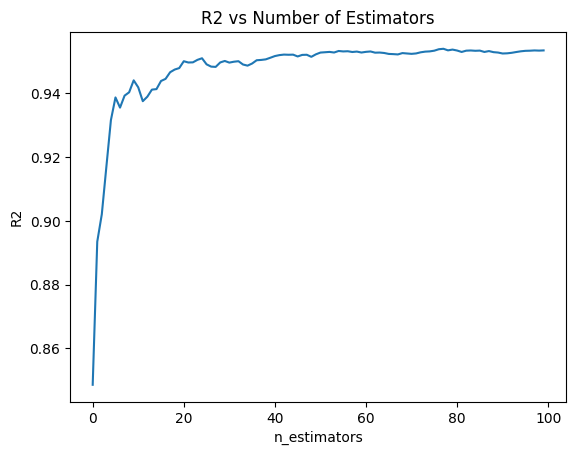

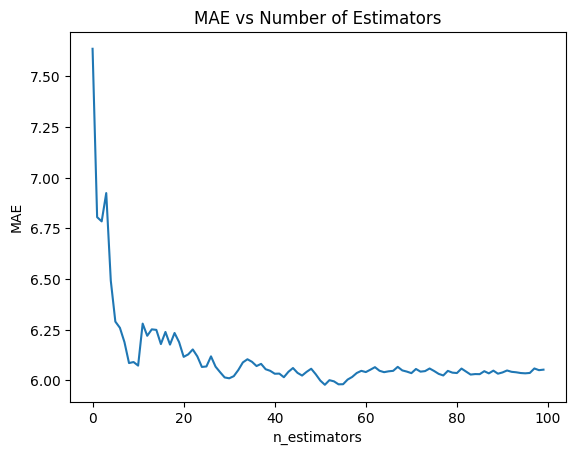

In [102]:
plt.plot(mse_list)
plt.xlabel('n_estimators')
plt.ylabel('MSE')
plt.title('MSE vs Number of Estimators')
plt.show()
plt.plot(r2_list)
plt.xlabel('n_estimators')
plt.ylabel('R2')
plt.title('R2 vs Number of Estimators')
plt.show()
plt.plot(mae_list)
plt.xlabel('n_estimators')
plt.ylabel('MAE')
plt.title('MAE vs Number of Estimators')
plt.show()